# ECE 143 Group 7 Costa Rica Poverty Level Prediction
Costa Rica is a country in central America with arount 5 million people, while in 2018, 21.1% of them are living in in proverty, with 0.3 million people living in extreme poverty.
- The big poverty gap in Costa Rica is a serious problem as 1.1 million people live in poverty!
- Investigating different relations between socio-economic parameters is a worthy task.
- Understanding the indicators and the factors affecting poverty will help us in tackling this problem in a better way

The objective of this project is to user various type of data collected in different ways online to help us predict the cause, factors, and ways to resolve poverty issues in Costa Rica.
To create nice visualizations and good insights, we originally used a kaggle dataset which contains 143 features as poverty level indicators. However we later realized this dataset is not enough for some insightful visualizations. Thus we went to collect data a few other sources, including scraping `google search data` from keywords, `Twitter` data scraping of the different president's posts, searching and processing official `census dataset` from official government department, etc.
<img src="https://image.slidesharecdn.com/sociales-151013022512-lva1-app6891/95/resumen-estudios-sociales-de-regiones-de-costa-rica-1-638.jpg?cb=1444704104" alt="drawing" style="width:400px;"/>

In [1]:
# Load plotting script
import plot
cr = plot.Plot()

Start to load train...
train loaded.
Start to load test...
test loaded.
Start to load household_characteristics...
Processing... Please wait...
Start to load edu...
Start to load edu_lvl...


## Number of childred / adult per household
This plot indicated as more income (richer) people get in Costa Rica, the households tends to have less children. We can also see that the number of people per household is slowly decreasing as we look through households with higher imcomes.

<img src="plots/Num_of_children_per_hh.png">


In [2]:
cr.plot_avg_num_per_hh()

# Household income

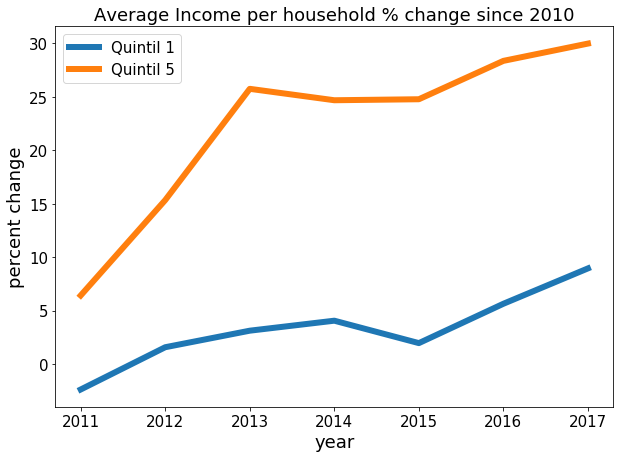

In [3]:
cr.plot_avg_income_change_since_2010()

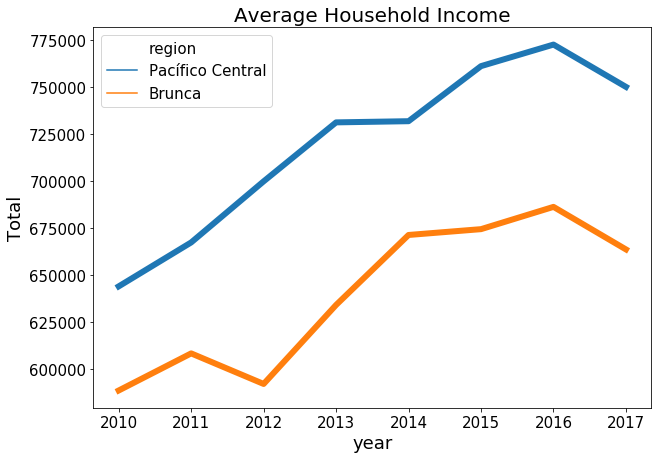

In [6]:
cr.plot_avg_hh_income_pc_b()

## Different regions lead by same government
Costa rica is divided into 6 regions by social economic parameter, however, administratively, it is divided into 7 provinces, each lead by a individual government. Interestingly, we obsere that `Pacifico Central` and `Brunca`, two different regions, are actually in the same province administratively, which means they are governed by the same government. As a result, we plotted the average household income per person over the year in those two provinces, and they do look parallel.

`We can conclude that the government has a big role to play to overcome poverty in Costa Rica!`

<img src="https://image.slidesharecdn.com/sociales-151013022512-lva1-app6891/95/resumen-estudios-sociales-de-regiones-de-costa-rica-1-638.jpg?cb=1444704104" alt="drawing" style="width:400px;"/>
<img src="https://www.creescapes.com/wp-content/uploads/costa-rica-map.png" alt="drawing" style="width:400px;"/>

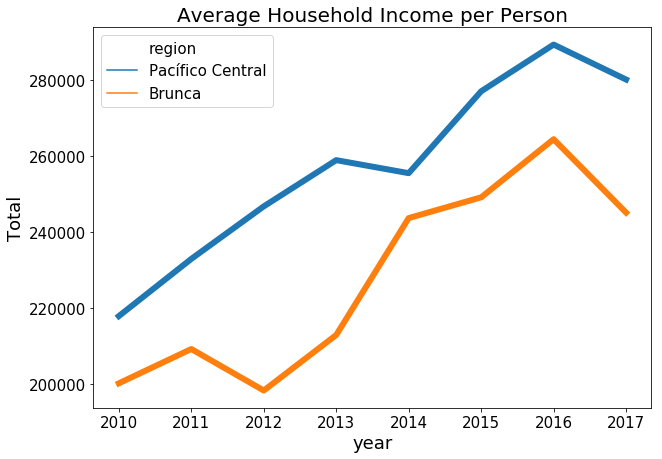

In [7]:
cr.plot_avg_hh_income_p_pc_b()

# Overcrowding: Number of person per room

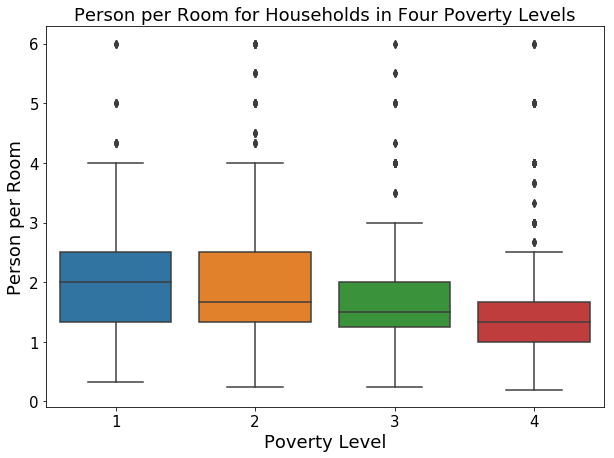

In [8]:
cr.plot_overcrowding()

In [9]:
cr.plot_poverty_laura()

In [10]:
cr.plot_poverty_luis()

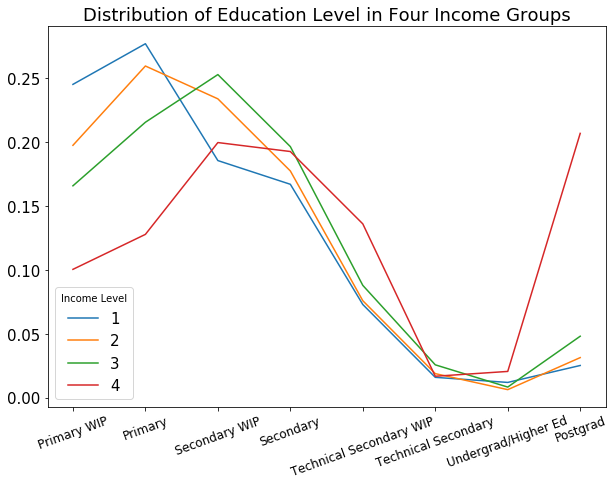

In [11]:
cr.plot_edu_level()

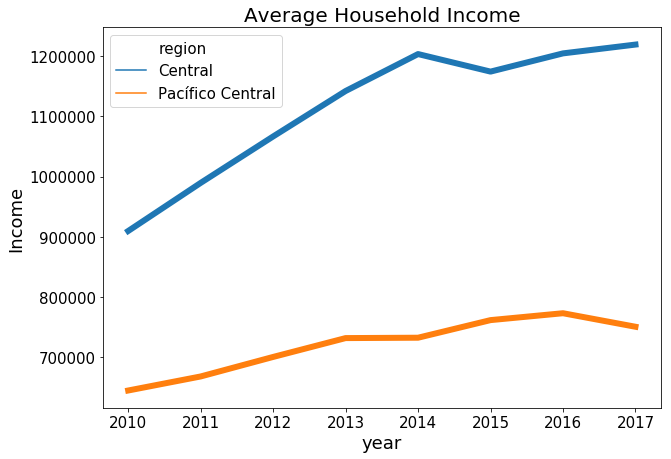

In [12]:
cr.plot_economy_income()

# Company Number Heatmap
Note that this heatmap will not work without an valid gmaps API Key. The API Key is expected to be stored in 'api_keys.py', at the same folder as this notebook. In the file, write gmap_key = 'AI......'

Installation see https://github.com/pbugnion/gmaps
<img src="plots/company_trend.gif">

In [13]:
import heat_map
years_locations = heat_map.load_companies_data()

In [14]:
heat_map.gmap_heat_map(years_locations[2012], '2012')

Figure(layout=FigureLayout(height='420px'))

# Data Scraping

In [1]:
# Preparation
from Twitter_data import *
from Data_scraping_v2 import *

## Run google search on the key words related to poverty
In order to find more factors causing the country's poverty, we ran a google web search on a list of keywords related to poverty, and from its appearance frequency, figure out some hidden insights.

``!!!The following cell will take approximately 15 minutes to execute``

In [35]:
data=web_search('poverty level indicators in costa rican households',['sanitation', 'food', 'jobs', 'inequality',
                                                                      'education','infrastructure','government',
                                                                      'resources','employment','home','housing',
                                                                      'development','economic','background'
                                                                     ],20)

In [36]:
wordcloud_google2=WordCloud(max_words=35628500,background_color='rgba(255, 255, 255, 0)', mode="RGBA").generate_from_frequencies(data)

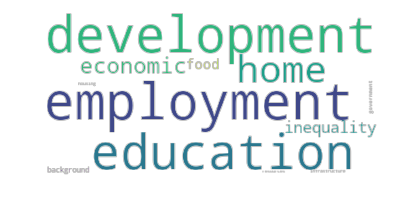

In [37]:
wordcloud_google2.to_file(os.getcwd() + "/results/google_search2.png")
    # show
plt.imshow(wordcloud_google2, interpolation="bilinear")
plt.axis("off")
plt.show()

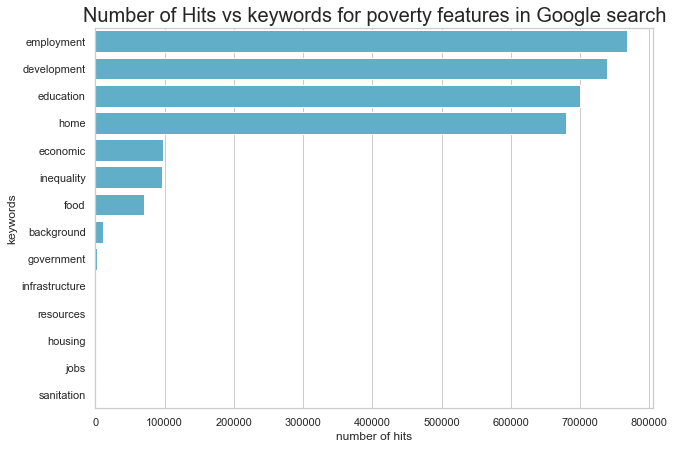

In [50]:
D2=pd.Series(data)
# D2=D2.drop(labels=['help','poor'])
D2=D2.sort_values(ascending=False)
# D2.plot.bar(rot=1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set(style='whitegrid')
sns.barplot(x=D2[:],y=D2.keys(), color="#4fb7db")
ax.set_xlabel("number of hits")
ax.set_ylabel("keywords")
ax.set_title('Number of Hits vs keywords for poverty features in Google search',fontsize=20)
plt.savefig(os.getcwd() + "/results/keyword_hits.png")

## Google maps API companies heatmap plotting



In [52]:
import heat_map
years_locations = heat_map.load_companies_data()

In [53]:
heat_map.gmap_heat_map(years_locations[2012], '2012')

Figure(layout=FigureLayout(height='420px'))

# Twitter Data Scraping

(We are directly using the downloaded Twitter data since we are not uploading API Keys to Github)

Since we find interesting pattern on the income level line plots, and the key changing point on that plot corresponds to a presendential change, we utilized Twitter API to scrap data from both presents' twitter posts, utilize google translate API (API key not provided in the repo), to translate it into English, and ran through again to generate a workcloud to visualize the difference.

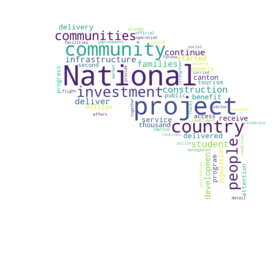

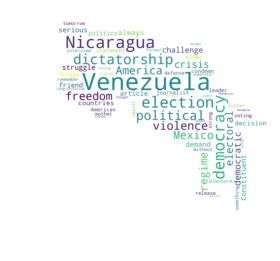

In [65]:
data1=cleaned_up_text(os.getcwd() + '/twitter_data/translated_Laura_ch_tweets.txt','Laura_Ch')
data2=cleaned_up_text(os.getcwd() + '/twitter_data/translated_CarlosAlvQ_tweets.txt','CarlosAlvQ')
data3=cleaned_up_text(os.getcwd() + '/twitter_data/translated_luisguillermosr_tweets.txt','luisguillermosr')
mask2=imr('costa_rica.jpg')
mask2=rgb2gray(mask2)
mask2[mask2>250]=255
mask2[mask2<250]=0
mask2=resize(mask2,(1200,1200))
wordcloud1 = WordCloud(max_words=35628500,mask=mask2,background_color='white').generate(data1)
wordcloud3 = WordCloud(max_words=356285,mask=mask2,background_color='white').generate(data3)
wordcloud_diff = find_diff(wordcloud1, wordcloud3)

makeImage_freq(dict(wordcloud_diff[0:60]),os.getcwd() + "/results/luisguiller")
makeImage_freq(dict(wordcloud_diff[-60:]),os.getcwd() + "/results/laura_ch")